
Les packages



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
# importation du fichier
from google.colab import files
uploaded = files.upload()

Saving Superstore.xlsx to Superstore.xlsx


In [ ]:
#Les fichier excel
data = pd.read_excel("/content/Superstore.xlsx")

In [ ]:
#les cinq primier ligne
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#information sur la dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
#Afficher la liste des catégories uniques
data = data.drop_duplicates()

In [ ]:
# Afficher les sales par catégories
data.groupby('Category').Sales.sum()

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [ ]:
#4)garder les données du catégorie Furniture trier par Order Date
df = data[data['Category'] == 'Furniture'].sort_values('Order Date')

In [ ]:
#5)Supprimer toutes les colonnes sauf Order Date et Sales
df = df[['Order Date', 'Sales']]

In [ ]:
df.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [ ]:
 #6) Transformer les Order Date en datetime
 df['Order Date']= pd.to_datetime(df['Order Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 7474 to 906
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.7 KB


In [ ]:
df.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [ ]:
#  7) Indexer la colonne Order Date
df = df.set_index('Order Date')

In [ ]:
df.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


In [ ]:
# une variable Y qui sera le regroupement des Sales par début de mois.
Y = df ['Sales'].resample('MS').sum()

In [ ]:

Y  #tous les début de mois

,Sales
Order Date,
2014-01-01,6242.5250
2014-02-01,1839.6580
2014-03-01,14573.9560
2014-04-01,7944.8370
2014-05-01,6912.7870
2014-06-01,13206.1256
2014-07-01,10821.0510
2014-08-01,7320.3465
2014-09-01,23816.4808


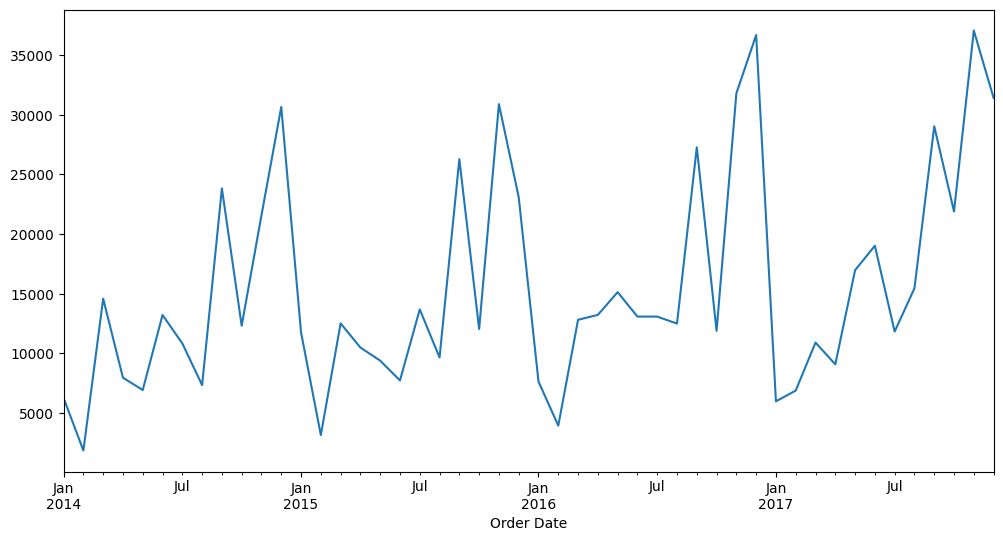

In [ ]:
 #Afficher le graphe de Y
 Y.plot(figsize=(12, 6))
 plt.show()

In [ ]:
 #10)Décomposer les données en train et test avec len(test)=11
 Y_train = Y[:len(Y)-11]
 Y_test = Y[len(Y)-11:]

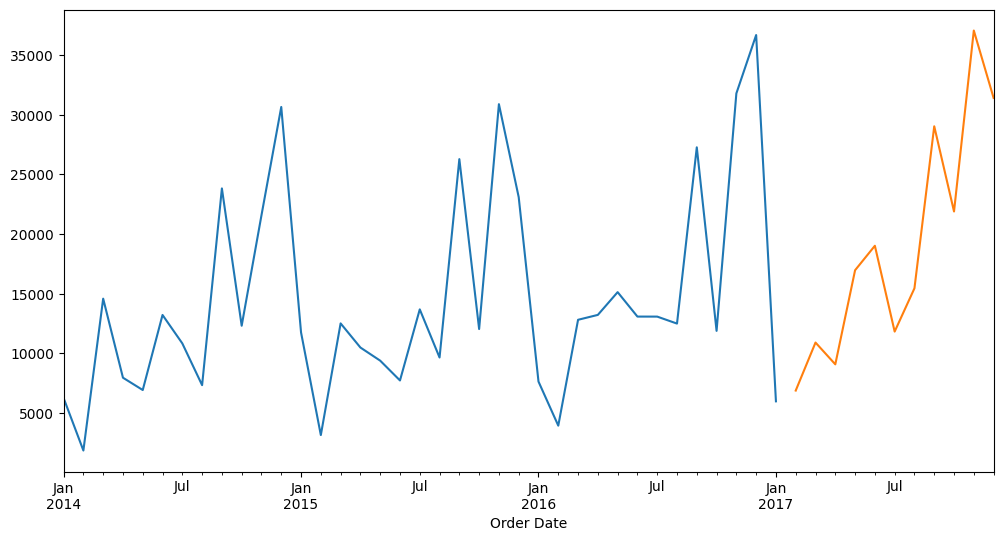

In [ ]:
#11)Afficher le graphique de Y_test et Y_train
Y_train.plot(figsize=(12,6))
Y_test.plot(figsize=(12,6))
plt.show()

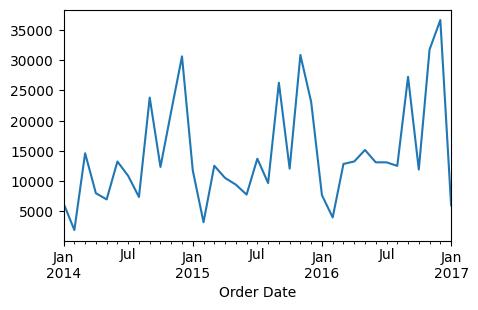

In [ ]:
Y_train.plot(figsize=(5,3))
plt.show()

In [ ]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(Y)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -4.699026242828903        |
| P-valeur       | 8.450793985809654e-05     |
| Conclusion     | La série est stationnaire |


comme on a trouve une valeur inferier à 5 donc la serie est stationnaire

In [ ]:
import itertools

In [ ]:
#En utilisant une boucle choisissez les meilleurs valeurs de p,d et q entre 0 et 2
 #pour lequel le modèle SARIMA admet la plus petit valeur de AIC
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))


In [107]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [ ]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [108]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [110]:
#initiation des dictionnaire
metric_aic_dict = {}

In [119]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
              try:
                      model=SARIMAX(Y_train, order=param , seasonal_order=param_seasonal)
                      model_fil=model.fit()
                      aic = model_fil.ai
                      metric_aic_dict[aic] = (param, param_seasonal)
              except:
                  continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/l

In [121]:
 #14)Pour ces valeurs de p,d et q appliquez le modèle SARIMA et évaluer les
 #erreurs en utilisant Ljong box et Shapiro
model= SARIMAX ( Y_train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fil=model.fit()
Predictions=model_fil.predict(start=Y_train.index[0], end=Y_test.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<function matplotlib.pyplot.show(close=None, block=None)>

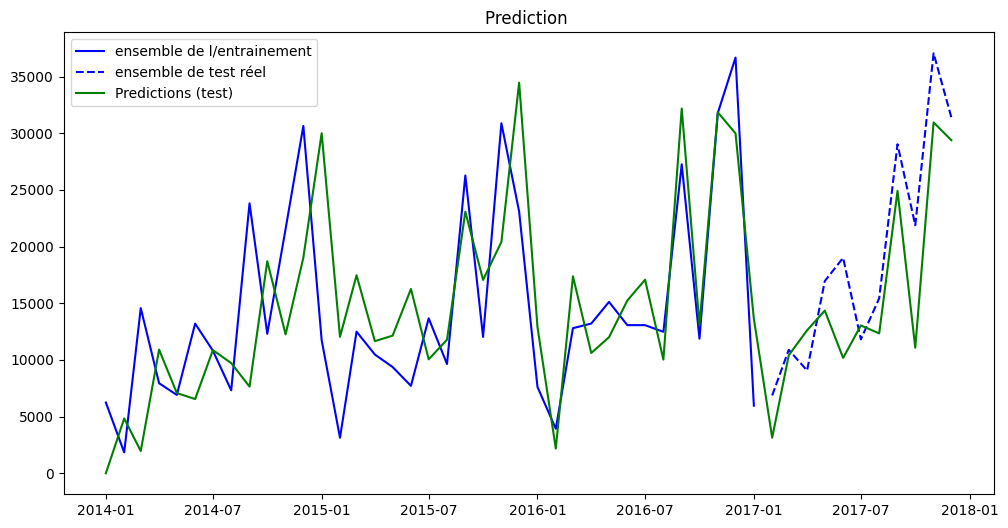

In [123]:
#traces la prediction et les données réelles avec les courbes
plt.figure(figsize=(12,6))
plt.plot(Y_train.index, Y_train.values,label='ensemble de l/entrainement', color='blue')
plt.plot(Y_test.index, Y_test.values,label='ensemble de test réel ', color='blue' , linestyle="--")
plt.plot(Predictions.index, Predictions,label='Predictions (test)', color='green')
plt.title ('Prediction ')
plt.legend()
plt.show